## **Practice Model Complexity in Linear Model**

In [1]:
# Import Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## **1. Load Dataset**

In [3]:
df = pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df = df.rename(columns={'LOR ': 'LOR', 'Chance of Admit ':'Chance of Admit'})

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## **Define X and y**

In [8]:
X = df.drop(columns=['Chance of Admit','Serial No.', 'Research'])
y = df['Chance of Admit']

In [9]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21
...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04
396,325,107,3,3.0,3.5,9.11
397,330,116,4,5.0,4.5,9.45
398,312,103,3,3.5,4.0,8.78


## **2. Data Splitting**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,# size from test set
    random_state = 42  # is used so that the resulting output remains the same even if it is run repeatedly
)

## **3. Ridge Regression**

In [12]:
# Ridge

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in range(len(alpha)):
   ridge = Ridge(alpha=alpha[i]) # model
   ridge.fit(X_train, y_train)

   y_predict_train = ridge.predict(X_train)
   training_mse.append(mean_squared_error(y_train, y_predict_train))

   y_predict_test = ridge.predict(X_test)
   mse_score = mean_squared_error(y_test, y_predict_test)
   testing_mse.append(mse_score)

   if i==0:
       score = mse_score
       best_alpha = alpha[i]

   if score > mse_score:
       score = mse_score
       best_alpha = alpha[i]

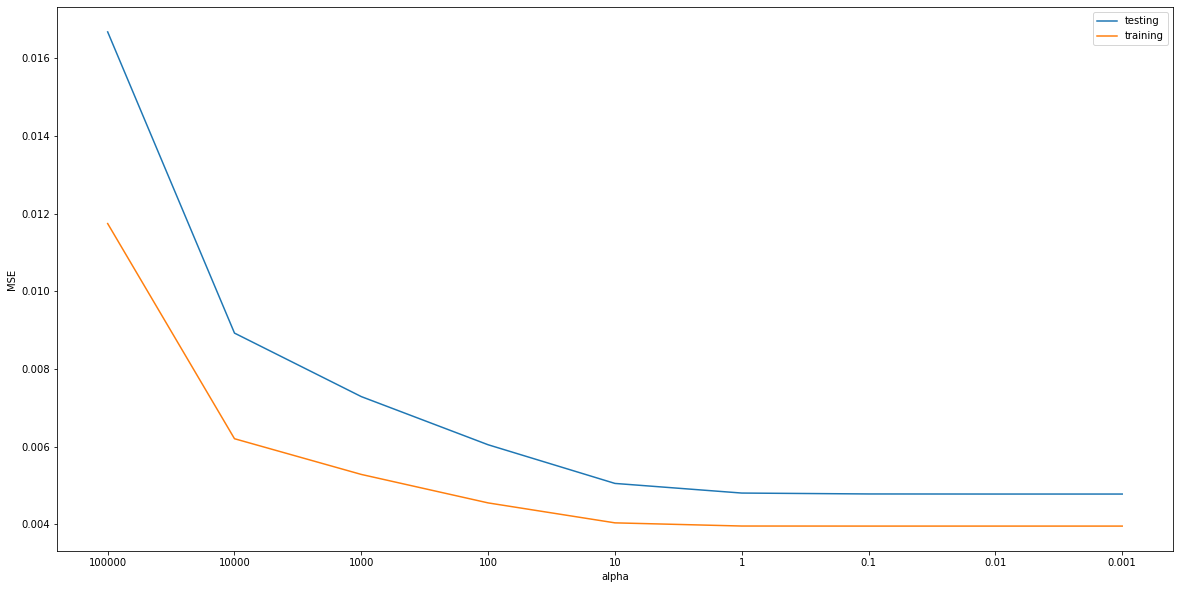

In [13]:
length= range (len(alpha))

plt.figure(figsize=(20,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['testing','training'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length, alpha);

## **4. What is the best alpha value for each model?**

In [14]:
print('Best Alpha:', best_alpha)
print('MSE Score:', score)

Best Alpha: 0.001
MSE Score: 0.004774773945134586


## **5. Comparing MSE**

In [15]:
# Fitting
ridgereg = Ridge(alpha = best_alpha)
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.001)

In [16]:
# Predict y_train and y_test
y_reg_train = ridgereg.predict(X_train)
y_reg_test = ridgereg.predict(X_test)

In [17]:
coef_ridgereg = pd.DataFrame({
    'feature_name': list(X),
    'feature_coef': ridgereg.coef_
})

In [18]:
coef_ridgereg

,feature_name,feature_coef
0,GRE Score,0.002376
1,TOEFL Score,0.002795
2,University Rating,0.007962
3,SOP,0.000222
4,LOR,0.016516
5,CGPA,0.113185


In [19]:
print('MSE train:', mean_squared_error(y_train, y_reg_train))
print('MSE test:', mean_squared_error(y_test, y_reg_test))

MSE train: 0.003949169303737893
MSE test: 0.004774773945134586


## **Interpretation**

- Alpha value is directly proportional to the penalty given. The greater the alpha value, the greater the penalty given to each variable.
- If the alpha value is too high, the model has a tendency to underfit, where the MSE value on the train and test sets is still large.
<br><br>
- The best alpha value = 0.001 with MSE 0.00477, although there is still overfitting, where the MSE train set value is better than the test set.

## **Experiment**

In [18]:
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)

Ridge(alpha=1000)

In [19]:
pd.DataFrame({
    'feature names': list(X),
    'coef': ridge.coef_
})

,feature names,coef
0,GRE Score,0.005827
1,TOEFL Score,0.006450
2,University Rating,0.004945
3,SOP,0.004376
4,LOR,0.005429
5,CGPA,0.003772


## **3. Lasso Regression**

In [20]:
# Lasso

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in range(len(alpha)):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train, y_train)
    
    y_predict_train = lasso.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train))
    
    y_predict_test = lasso.predict(X_test)
    mse_score = mean_squared_error(y_test, y_predict_test)
    testing_mse.append(mse_score)
    
    if i==0:
        score = mse_score
        best_alpha = alpha[i]
        
    if score > mse_score:
        score = mse_score
        best_alpha = alpha[i]

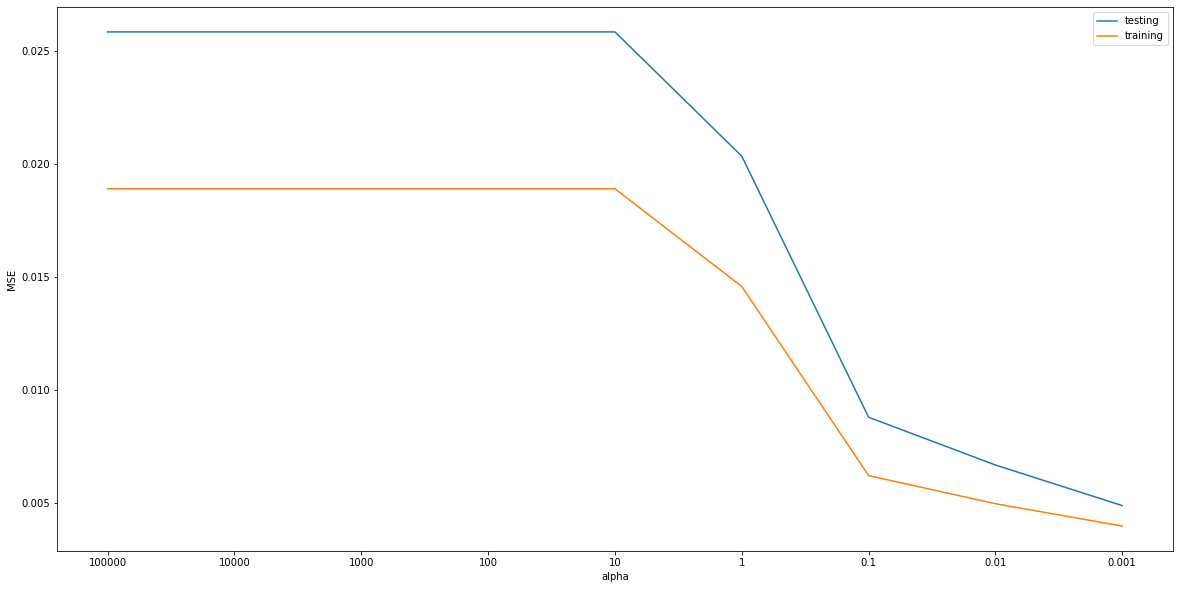

In [21]:
length= range (len(alpha))

plt.figure(figsize=(20,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['testing','training'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length, alpha);

## **4. What is the best alpha value for each model?**

In [20]:
print('Best Alpha:', best_alpha)
print('MSE score:', score)

Best Alpha: 0.001
MSE score: 0.004774773945134586


## **5. Comparing MSE**

In [21]:
# Fitting
lassoreg = Lasso(alpha = best_alpha)
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [22]:
# Predict
y_reg_train = lassoreg.predict(X_train)
y_reg_test = lassoreg.predict(X_test)

In [23]:
coef_lassoreg = pd.DataFrame({
    'feature_names': list(X),
    'feature_coef': lassoreg.coef_
})

In [24]:
coef_lassoreg

,feature_names,feature_coef
0,GRE Score,0.002667
1,TOEFL Score,0.003163
2,University Rating,0.008074
3,SOP,0.000193
4,LOR,0.016630
5,CGPA,0.102310


In [25]:
print('MSE train:', mean_squared_error(y_train, y_reg_train))
print('MSE test:', mean_squared_error(y_test, y_reg_test))

MSE train: 0.0039591843566051345
MSE test: 0.004866666859869572


## **Interpretation**

- If the alpha value is too high, the model has a tendency to underfit because the MSE value of the train and test sets is still high.
- The best alpha value = 0.001 and the difference in MSE values ​​between the two sets is not too far apart.

## **Experiment**

In [28]:
lasso = Lasso(alpha=1000)
lasso.fit(X_train, y_train)

Lasso(alpha=1000)

In [29]:
pd.DataFrame({
    'feature names': list(X),
    'coef': lasso.coef_
})

,feature names,coef
0,GRE Score,0.0
1,TOEFL Score,0.0
2,University Rating,0.0
3,SOP,0.0
4,LOR,0.0
5,CGPA,0.0


- Lasso can also be used as feature selection because it can make the coefficient value of the variable to 0.
- The greater the alpha value, the greater the penalty given, thus making the coefficient value 0. In the example above, if alpha is set = 1000, what happens is the coef value for all variables becomes 0.

## **Conclusion**

1. Ridge regression
   - Best Alpha = 0.001
   - MSE test = 0.0047
<br><br>
2. Lasso regression
   - Best Alpha = 0.001
   - MSE test = 0.0048